# House price prediction


# Importing libraries

In [1]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')


# Loading the dataset

In [2]:
usa=pd.read_csv("C:/Users\Aashika jain/Documents/melbourne_housing.csv")

In [3]:
usa.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


# Describing our data

In [4]:
usa.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# Cleaning and analyzing the data

In [5]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
usa.dropna(inplace=True)

In [7]:
usa.shape

(6196, 21)

In [8]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   int64  
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   int64  
 10  Bedroom2       6196 non-null   int64  
 11  Bathroom       6196 non-null   int64  
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   int64  
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

# Visulaizing the data

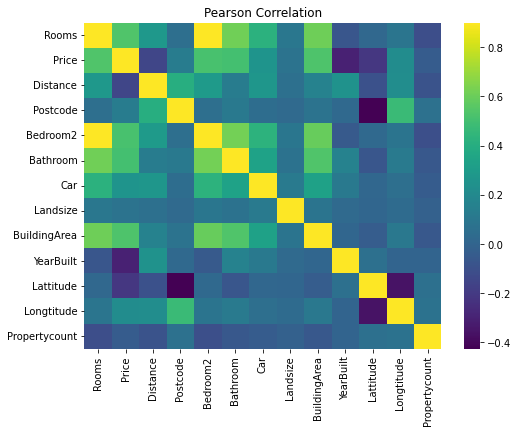

In [9]:
plt.figure(figsize = (8,6))
sns.heatmap(usa.corr(), vmax = 0.9, cmap = 'viridis')
plt.title("Pearson Correlation")
plt.show()


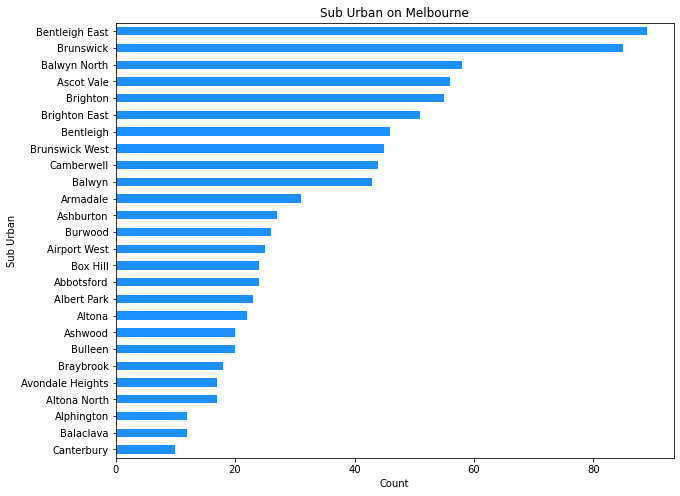

In [10]:
plt.figure(figsize = (10,8))
usa['Suburb'][0:900].value_counts().sort_values().plot(kind = 'barh', color = 'dodgerblue')
plt.xlabel("Count")
plt.ylabel("Sub Urban")
plt.title("Sub Urban on Melbourne")
plt.rcParams.update({'font.size': 5})
plt.show()

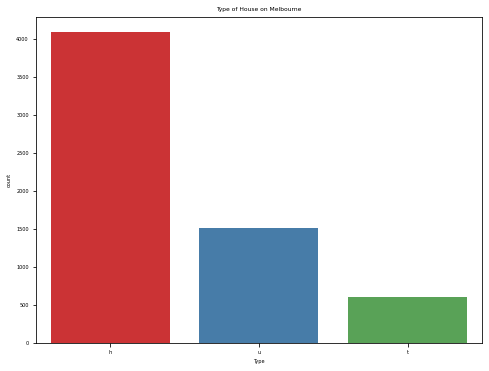

In [11]:
plt.figure(figsize = (8,6))
sns.countplot(usa['Type'], palette = 'Set1')
plt.title("Type of House on Melbourne")
plt.show()

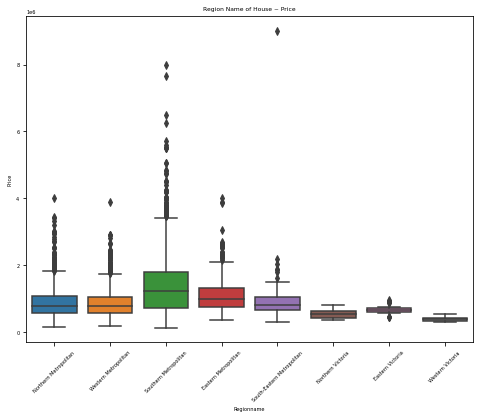

In [12]:
plt.figure(figsize = (8,6))
chart = sns.boxplot(data = usa, x = 'Regionname', y = 'Price')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Region Name of House ~ Price")
plt.show()

In [13]:
for i in usa.columns.tolist():
    usa[i] = usa[i].astype('category').cat.codes

usa.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,0,2790,1,0,839,1,18,4,12,50,...,0,0,110,85,23,29,1712,1839,2,135
2,0,4520,2,0,1118,3,18,5,12,50,...,1,0,88,224,23,29,1690,1854,2,135
4,0,4882,3,0,1174,4,112,6,12,50,...,0,2,74,212,130,29,1722,1851,2,135
6,0,1027,2,0,1291,1,112,9,12,50,...,1,0,198,313,32,29,1788,1932,2,135
7,0,6101,1,0,1193,1,112,13,12,50,...,0,2,209,143,17,29,1737,1869,2,135


__Splitting the data into train and test__

In [14]:
X = usa.drop('Price', axis = 1)
y = usa['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4337, 20)
(4337,)
(1859, 20)
(1859,)


__Training linear regression model__


In [15]:
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

Wall time: 70.7 ms


0.797552615387307

In [16]:
y_pred = lr.predict(X_test)
print(y_pred)

[ 902.21064695  450.80298398  843.10639156 ...  128.26772664 1022.76678321
  708.4028615 ]


In [17]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))

Mean Absolute Error :  145.48
Mean Squared Error :  33710.72
Root Mean Squared Error :  12.061509026651681


__Visualizing the prediction of linear regression model__

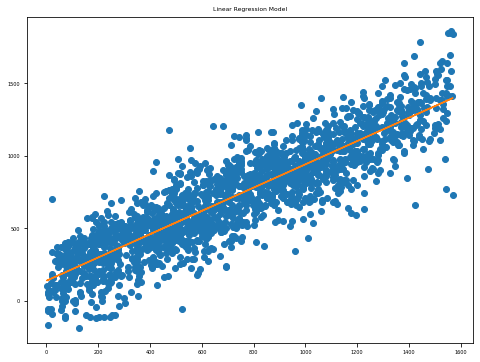

In [18]:
x = y_test
y = y_pred

plt.figure(figsize = (8,6))
plt.title("Linear Regression Model")
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b)

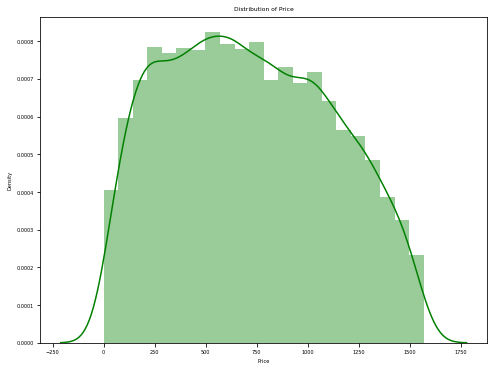

In [19]:
plt.figure(figsize = (8,6))
sns.distplot(usa['Price'], color = 'g')
plt.title("Distribution of Price")
plt.show()